# DATA 620 Project 2
**Team 5:** Santosh Manjrekar, Dhananjay Kumar ,Song Yoon(Andy)Hwang

Project Description

The goal of the project is to create and analyze a two-mode social network for Newman's scientific collaboration network. We will be analyzing the relationship between *authors* and *publications* they have jointly worked . 

Specific project requirements:

- Identify a large two-mode network dataset. Data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
- Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
- What can you infer about each of the distinct groups?

We will be extracting following information from the data

- Authors writing most publications
- Publications on which most authors collaborated.

Data Source

This is the co-authorship network based on preprints posted to Condensed Matter section of arXiv E-Print Archive between 1995 and 1999. This dataset can be classified as a two-mode or affiliation network since there are two types of “nodes” (authors and papers) and connections exist only between different types of nodes. 

Data Import

After downloading data from http://opsahl.co.uk/tnet/datasets/Newman-Cond_mat_95-99-two_mode.txt and saved it on the local file system.

In [40]:
#Libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from networkx.algorithms import bipartite

In [41]:
# loading author research paper data
data_author_paper = "Newman-Cond_mat_95-99-two_mode.txt"
author_publications = pd.read_csv(data_author_paper, delim_whitespace=True, header=None, names=['Author', 'Publication'])

#For our study we will consider only 1000 records
author_publications = author_publications.iloc[0:1000]




In [42]:
##Update the author name and publication name so that it is readable
for x in range(1000):
    authorname = author_publications.loc[x,'Author']
    author_publications.loc[x,'Author']= "Auth"+str(authorname)
    authorname = author_publications.loc[x,'Publication']
    author_publications.loc[x,'Publication']= "Pub"+str(authorname)



In [43]:
author_publications.head()

Author Publication
0  Auth1        Pub1
1  Auth1      Pub469
2  Auth1      Pub563
3  Auth1      Pub813
4  Auth1     Pub1361

In [44]:
#Let create small dataset so that we can look at tow-mode graph
auth_pub_small = author_publications.iloc[0:100]

In [45]:
auth_pub_small.head()

Author Publication
0  Auth1        Pub1
1  Auth1      Pub469
2  Auth1      Pub563
3  Auth1      Pub813
4  Auth1     Pub1361

In [46]:
# Total number of Authors
len(auth_pub_small.Author.unique())

6

In [47]:
# Total number of Pulications
len(auth_pub_small.Publication.unique())

83

In [48]:
# checking no of pubications each author participated 
rels = auth_pub_small.groupby('Author')
rels.size()

Author
Auth1    20
Auth2     3
Auth3     2
Auth4    56
Auth5     6
Auth6    13
dtype: int64

In [50]:
#Seperate data into Authors and Publications
small_authList = auth_pub_small.Author.unique()
small_pubList = auth_pub_small.Publication.unique()

small_authList = small_authList.tolist()
small_pubList = small_pubList.tolist()



###Two-mode Network Graph

Following graph shows two sets of nodes and relationships between sets. The first set of nodes are Authors and second set is a publication papers. Sets of nodes are related, but there is no relation between each set of nodes. This shows there is no connection between Authors. We can also notice there is no link between publications.

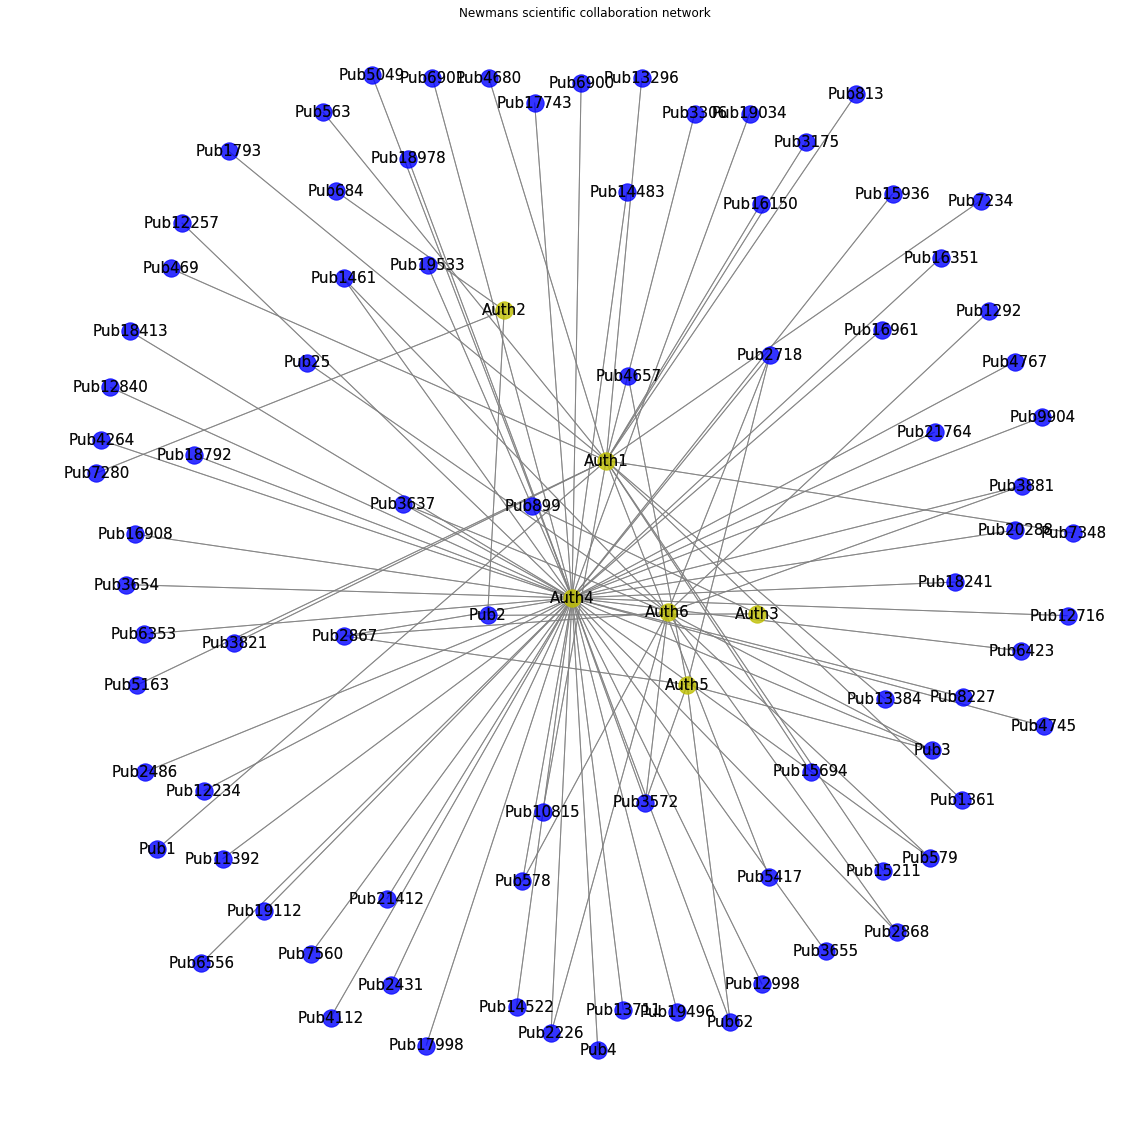

In [51]:
#Small subset data to show two-mode graph
%matplotlib inline


fig = plt.figure(figsize=(15, 15))

B = nx.Graph()
B.add_nodes_from(small_authList,color='y', bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(small_pubList,color='b', bipartite=1)

for index, row in auth_pub_small.iterrows():
    B.add_edge(row['Author'], row['Publication'])


    

pos = nx.spring_layout(B, k=0.5, iterations=25)
nx.draw(B, nodelist = small_authList, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey', node_color='y',arrows=True)
nx.draw(B, nodelist = small_pubList, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey',  node_color='b', arrows=True)

plt.title('Newmans scientific collaboration network')
plt.show()   




In [52]:
authorList = author_publications.Author.unique()
authorList = authorList.tolist()
print(len(authorList))
pubList = author_publications.Publication.unique()
pubList = pubList.tolist()
print(len(pubList))

64
848


In [53]:
# checking no of pubications each author participated 
rels = author_publications.groupby('Author')
rels.size()

Author
Auth1     20
Auth10     1
Auth11    11
Auth12     1
Auth13     3
Auth14     1
Auth15    37
Auth16    17
Auth17    40
Auth18    16
Auth19     4
Auth2      3
Auth20     7
Auth21     1
Auth22    30
Auth23     3
Auth24    14
Auth25     9
Auth26    10
Auth27    17
Auth28    18
Auth29     1
Auth3      2
Auth30    21
Auth31     7
Auth32    12
Auth33    12
Auth34     2
Auth35    12
Auth36    70
          ..
Auth40    13
Auth41     1
Auth42     2
Auth43    30
Auth44    10
Auth45     4
Auth46     6
Auth47    13
Auth48    18
Auth49    19
Auth5      6
Auth50    18
Auth51     5
Auth52    39
Auth53    34
Auth54    28
Auth55    14
Auth56    21
Auth57    16
Auth58    14
Auth59    37
Auth6     40
Auth60     7
Auth61     7
Auth62    17
Auth63     1
Auth64     7
Auth7      7
Auth8     17
Auth9     19
Length: 64, dtype: int64

Following is an entire two-mode graph showing a relationship between Authors and Publications. We will be working with the whole dataset for the rest of the project.

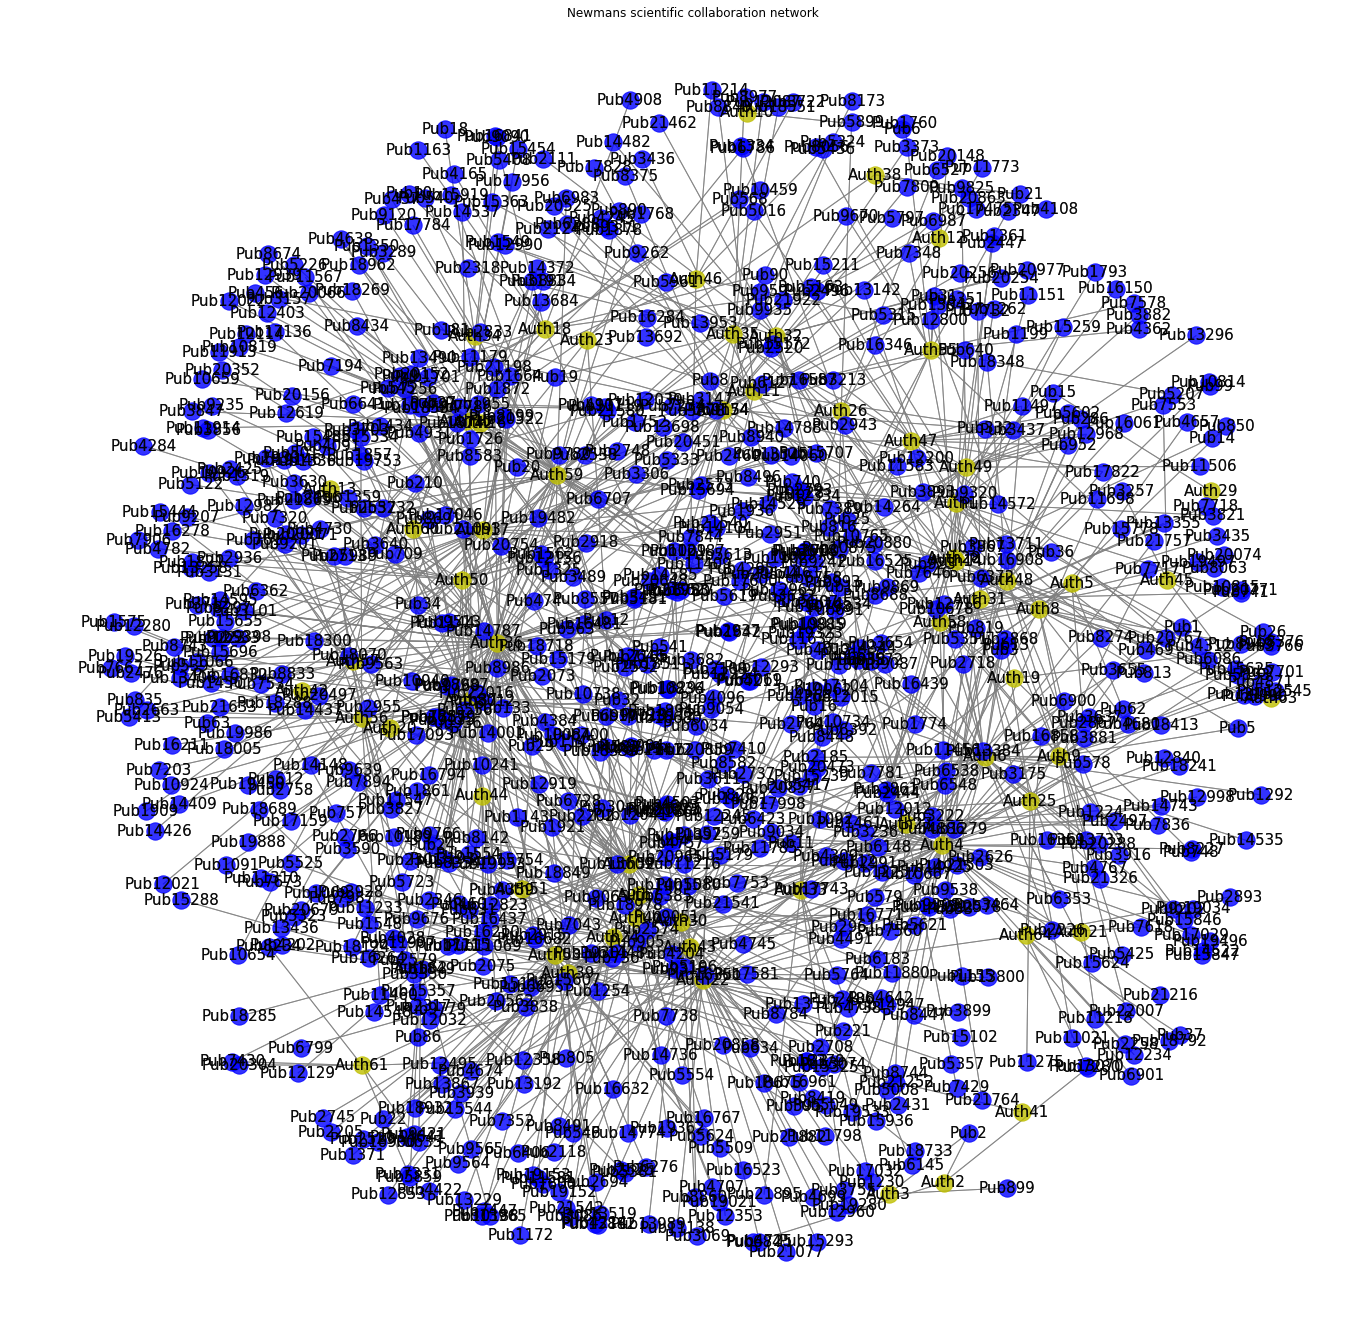

In [54]:
%matplotlib inline
fig = plt.figure(figsize=(18, 18))
B = nx.Graph()
B.add_nodes_from(authorList, bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(pubList, bipartite=1)

for index, row in author_publications.iterrows():
    B.add_edge(row['Author'], row['Publication'])

#pos = nx.spring_layout(B, k=0.5, iterations=2)
pos = nx.spring_layout(B, k=0.3, iterations=75)
nx.draw(B, nodelist = authorList, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey', node_color = 'y', arrows=True)
nx.draw(B, nodelist = pubList, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey', node_color = 'b', arrows=True)

plt.title('Newmans scientific collaboration network')
plt.show()

Get information about node sets. There are 64 Authors and 848 publications.

In [55]:
nx.is_connected(B), nx.is_bipartite(B)

(False, True)

This network is pretty large and graph is disconnected. Let's look at the max size subgraph for our study.

In [56]:
B_max = max(nx.connected_component_subgraphs(B), key=len)

In [57]:
nx.is_connected(B_max),nx.is_bipartite(B_max)

(True, True)

In [58]:
nx.number_of_nodes(B_max)

184

In [59]:
top_nodes = {n for n, d in B_max.nodes(data=True) if d['bipartite']==1}
bottom_nodes = set(B_max) - top_nodes

In [60]:
sorted(B_max.degree, key=lambda x: x[1], reverse=True)

[('Auth52', 39),
 ('Auth59', 37),
 ('Auth53', 34),
 ('Auth22', 30),
 ('Auth27', 17),
 ('Auth26', 10),
 ('Auth25', 9),
 ('Auth60', 7),
 ('Auth20', 7),
 ('Auth51', 5),
 ('Auth19', 4),
 ('Pub11', 4),
 ('Pub13', 3),
 ('Pub34', 3),
 ('Pub958', 3),
 ('Pub1115', 2),
 ('Pub10084', 2),
 ('Pub1143', 2),
 ('Pub8784', 2),
 ('Pub1144', 2),
 ('Pub2538', 2),
 ('Pub6728', 2),
 ('Pub4503', 2),
 ('Pub12012', 2),
 ('Pub14736', 2),
 ('Pub30', 2),
 ('Pub1851', 2),
 ('Pub9766', 2),
 ('Pub29', 2),
 ('Pub5554', 2),
 ('Pub10241', 2),
 ('Pub2537', 2),
 ('Pub2497', 2),
 ('Pub5759', 2),
 ('Pub7836', 1),
 ('Pub7673', 1),
 ('Pub11138', 1),
 ('Pub5509', 1),
 ('Pub8744', 1),
 ('Pub4284', 1),
 ('Pub17784', 1),
 ('Pub9034', 1),
 ('Pub7447', 1),
 ('Pub1334', 1),
 ('Pub9087', 1),
 ('Pub890', 1),
 ('Pub4096', 1),
 ('Pub3464', 1),
 ('Pub3766', 1),
 ('Pub9779', 1),
 ('Pub7753', 1),
 ('Pub540', 1),
 ('Pub20859', 1),
 ('Pub18962', 1),
 ('Pub2833', 1),
 ('Pub17600', 1),
 ('Pub13882', 1),
 ('Pub8012', 1),
 ('Pub6276', 1),
 ('Pu

In [61]:
#Graph can be queried to get information about node sets
#top_nodes, bottom_nodes = bipartite.sets(B)

#Total of 848 publications
print (len(top_nodes))
print (len(bottom_nodes))


172
12


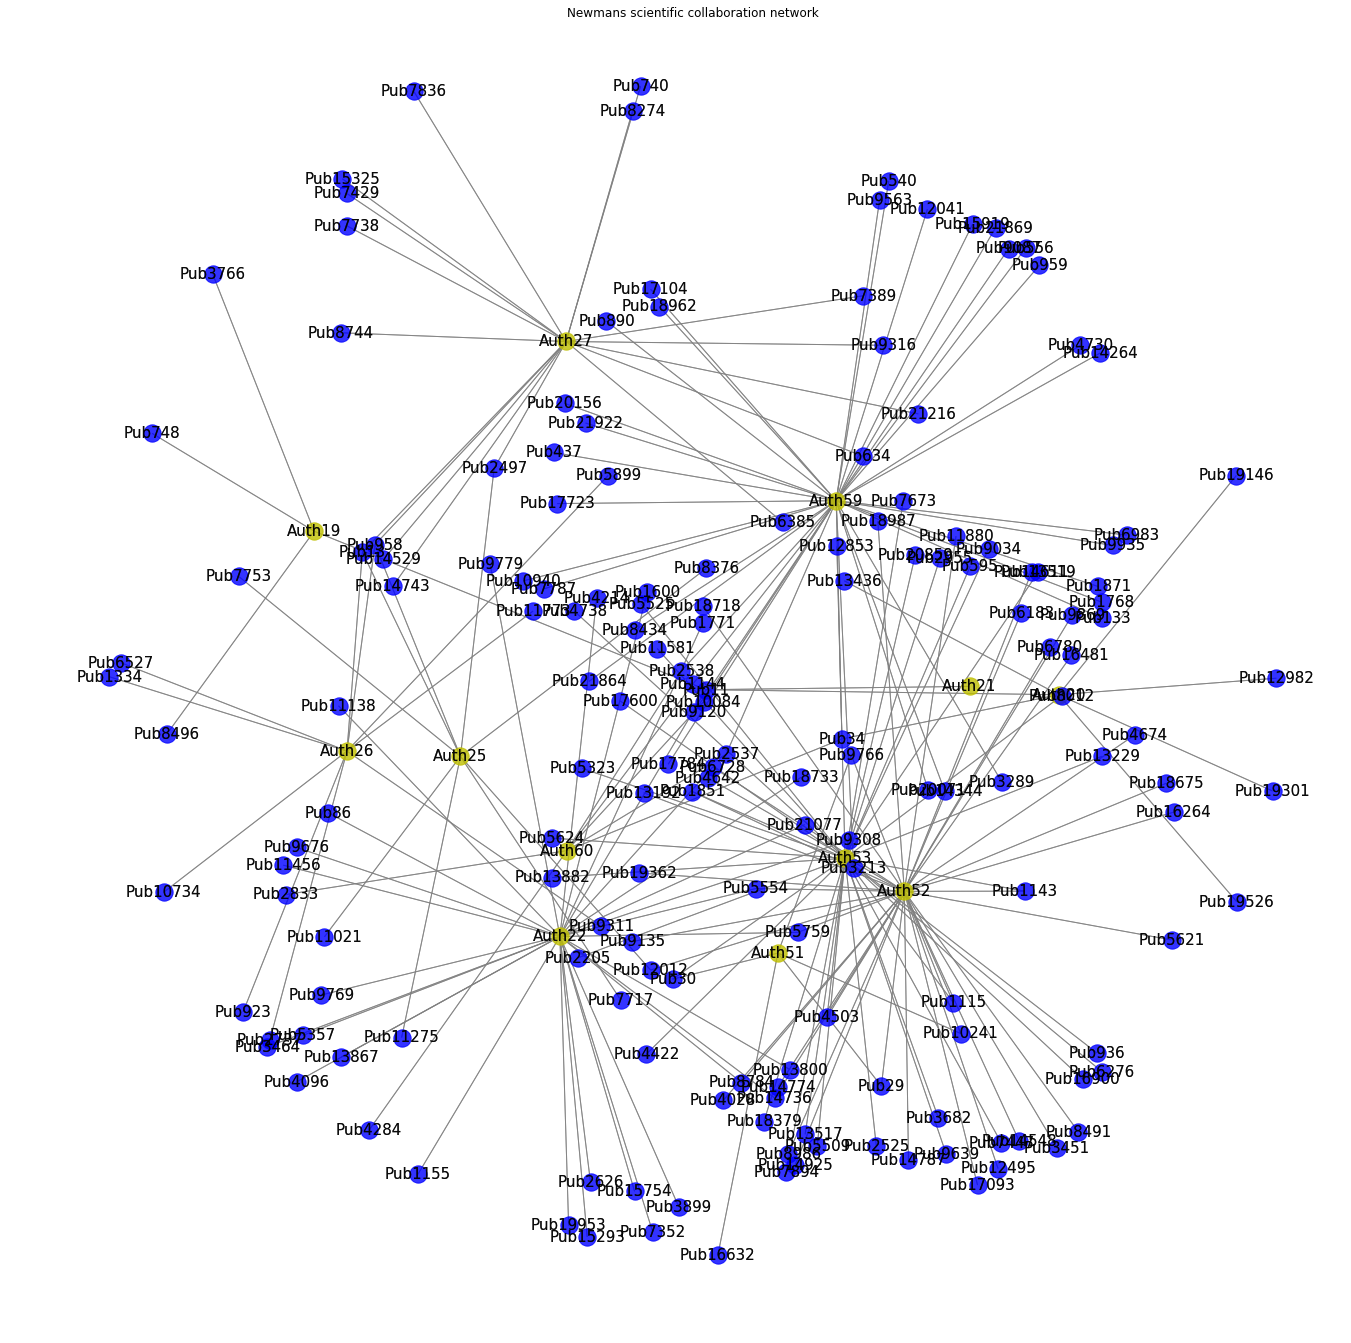

In [62]:
%matplotlib inline
fig = plt.figure(figsize=(18, 18))
B = nx.Graph()
B.add_nodes_from(authorList, bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(pubList, bipartite=1)

for index, row in author_publications.iterrows():
    B.add_edge(row['Author'], row['Publication'])

#pos = nx.spring_layout(B, k=0.5, iterations=2)
pos = nx.spring_layout(B, k=0.3, iterations=75)
nx.draw(B_max, nodelist = bottom_nodes, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey', node_color = 'y', arrows=True)
nx.draw(B_max, nodelist = top_nodes, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey', node_color = 'b', arrows=True)

plt.title('Newmans scientific collaboration network')
plt.show()

In [68]:
#From the graph looks like Auth52, Auth59 have written multiple publications.
#Authors
df = pd.DataFrame(list(top_nodes), columns=['Publication'])
df

Publication
0       Pub7836
1       Pub7673
2      Pub11138
3       Pub5509
4       Pub8744
5       Pub1115
6       Pub4284
7      Pub17784
8       Pub9034
9       Pub7447
10      Pub1334
11      Pub9087
12       Pub890
13      Pub4096
14      Pub3464
15      Pub3766
16      Pub9779
17        Pub13
18      Pub7753
19       Pub540
20     Pub20859
21     Pub18962
22      Pub2833
23     Pub10084
24     Pub17600
25      Pub1143
26     Pub13882
27      Pub8012
28      Pub8784
29      Pub6276
..          ...
142    Pub12853
143     Pub3451
144     Pub2537
145     Pub6527
146    Pub13436
147     Pub9563
148     Pub1871
149    Pub15754
150     Pub9316
151    Pub17723
152     Pub2497
153    Pub10940
154    Pub21864
155     Pub5525
156     Pub9769
157     Pub9869
158    Pub16900
159     Pub9935
160     Pub9135
161     Pub9311
162     Pub5759
163    Pub13867
164     Pub1155
165     Pub7389
166     Pub4642
167    Pub11773
168    Pub14264
169    Pub15325
170    Pub13192
171    Pub11275

[172 rows x 1 columns]

In [71]:
#Total of 64 Authors
print (len(bottom_nodes))

#Authors
df_author = pd.DataFrame(list(bottom_nodes), columns=['Author'])
df_author

12


Author
0   Auth25
1   Auth26
2   Auth27
3   Auth60
4   Auth53
5   Auth51
6   Auth52
7   Auth22
8   Auth21
9   Auth19
10  Auth59
11  Auth20

In [72]:
#Get total number of nodes in the graph (Authors + Publications)
bipartite.sets(B_max)
nx.number_of_nodes(B_max)

184

In [73]:
#Diameter of the graph. 
print(B_max.size())

200


In [74]:
#Displays information how nodes are grouped inside the graph
#Publication bipartite value is 1 and Author bipartite value is 0
df = pd.DataFrame(list(bipartite.color(B_max).items()), columns=['Node', 'bipartite'])
df.sort_values(['bipartite', 'Node'], ascending = True, inplace=True)
df

Node  bipartite
90     Auth19          0
91     Auth20          0
92     Auth21          0
64     Auth22          0
18     Auth25          0
175    Auth26          0
1      Auth27          0
142    Auth51          0
25     Auth52          0
145    Auth53          0
99     Auth59          0
100    Auth60          0
103  Pub10084          1
47   Pub10241          1
177  Pub10734          1
132  Pub10940          1
77      Pub11          1
22   Pub11021          1
65   Pub11138          1
26    Pub1115          1
24   Pub11275          1
28    Pub1143          1
104   Pub1144          1
75   Pub11456          1
86    Pub1155          1
170  Pub11581          1
183  Pub11773          1
48   Pub11880          1
21   Pub12012          1
133  Pub12041          1
..        ...        ...
153   Pub8012          1
10    Pub8274          1
23    Pub8376          1
128   Pub8434          1
41    Pub8491          1
141   Pub8496          1
74      Pub86          1
2     Pub8744          1
42    Pub8784          1
109    Pub890          1
43    Pub8986          1
148   Pub9034          1
108   Pub9087          1
129   Pub9120          1
44    Pub9135          1
179    Pub923          1
81    Pub9308          1
182   Pub9311          1
14    Pub9316          1
162    Pub936          1
130   Pub9563          1
11     Pub958          1
122    Pub959          1
159   Pub9639          1
82    Pub9676          1
45    Pub9766          1
87    Pub9769          1
68    Pub9779          1
46    Pub9869          1
131   Pub9935          1

[184 rows x 2 columns]

#Metrics and Inference

###Shortest Path

Function *shortest_path_length* of *NetworkX* library allows us to find the *Shortest Path* from a specific origin to a specified destination in a given network while minimizing the total cost associated with the path. 



In [38]:
#Gives information about average shortest path between nodes 
nx.average_shortest_path_length(B_max)
#print(nx.info(B_max))

5.970301734378713

In [47]:
#Shortest path between Authors and Publication
df = pd.DataFrame(list(bipartite.color(B_max).items()), columns=['Node', 'bipartite'])
df1 = df[(df.bipartite == 1)]
df2 = df[(df.bipartite == 0)]

cols = ['Publication', 'Author', 'ShortestPath']
lst = []
for i1, m1 in df1.iterrows():
    for i2, m2 in df2.iterrows():
        s1 = m1[0]
        s2 = m2[0]
        e = False
        if [s1, s2, nx.shortest_path_length(B_max, s1, s2)] in lst:
            e = True
        if [s2, s1, nx.shortest_path_length(B_max, s1, s2)] in lst:
            e = True
        if not e:
            lst.append([s1, s2, nx.shortest_path_length(B_max, s1, s2)])

ShortPath = pd.DataFrame(lst, columns=cols)
ShortPath.sort_values(['ShortestPath', 'Publication', 'Author'], ascending = True, inplace=True)
ShortPath

Publication  Author  ShortestPath
1545    Pub10084  Auth59             1
1546    Pub10084  Auth60             1
423     Pub10241  Auth51             1
422     Pub10241  Auth52             1
2051    Pub10734  Auth26             1
1833    Pub10940  Auth59             1
1158       Pub11  Auth19             1
1159       Pub11  Auth20             1
1160       Pub11  Auth21             1
1157       Pub11  Auth22             1
241     Pub11021  Auth25             1
1325    Pub11138  Auth22             1
386      Pub1115  Auth52             1
388      Pub1115  Auth53             1
253     Pub11275  Auth25             1
482      Pub1143  Auth52             1
484      Pub1143  Auth53             1
1521     Pub1144  Auth59             1
1522     Pub1144  Auth60             1
1109    Pub11456  Auth22             1
1181     Pub1155  Auth22             1
784     Pub11581  Auth53             1
2063    Pub11773  Auth26             1
614     Pub11880  Auth52             1
265     Pub12012  Auth25             1
266     Pub12012  Auth52             1
1845    Pub12041  Auth59             1
626     Pub12495  Auth52             1
1036    Pub12853  Auth53             1
1471    Pub12982  Auth20             1
...          ...     ...           ...
117      Pub7738  Auth59            11
118      Pub7738  Auth60            11
1583     Pub7787  Auth26            11
1572     Pub7787  Auth27            11
57       Pub7836  Auth59            11
58       Pub7836  Auth60            11
129      Pub8274  Auth59            11
130      Pub8274  Auth60            11
1775     Pub8434  Auth26            11
1764     Pub8434  Auth27            11
141      Pub8744  Auth59            11
142      Pub8744  Auth60            11
1715      Pub890  Auth26            11
1704      Pub890  Auth27            11
1787     Pub9087  Auth26            11
1776     Pub9087  Auth27            11
1799     Pub9120  Auth26            11
1788     Pub9120  Auth27            11
2013      Pub923  Auth59            11
2014      Pub923  Auth60            11
2037     Pub9311  Auth59            11
2038     Pub9311  Auth60            11
153      Pub9316  Auth59            11
154      Pub9316  Auth60            11
1811     Pub9563  Auth26            11
1800     Pub9563  Auth27            11
1607      Pub959  Auth26            11
1596      Pub959  Auth27            11
1823     Pub9935  Auth26            11
1812     Pub9935  Auth27            11

[2064 rows x 3 columns]

###Node centralities

We will be showing metrics

- Closeness - Closeness is the inverse sum of all shortest paths
- Betweenness - Number of shortest paths that pass through a node
- Degree - The number other nodes that a node is connected to

In our case, Author52 tops the list in all three metrics. 
Looking at the degree value we can say that Author52 has written most of the pubications and ublication pub11 is written by most of the authors.Publications with higher degree will have higher closeness.

In [81]:
#Closeness Betweenness Degrees centrality between Senetors and Subjects
close = nx.closeness_centrality(B_max)
between = nx.betweenness_centrality(B_max)
degree = nx.degree_centrality(B_max)
df1 = pd.DataFrame(list(close.items()), columns=['Node', 'Closeness'])
df2 = pd.DataFrame(list(between.items()), columns=['Node', 'Betweenness'])
df3 = pd.DataFrame(list(degree.items()), columns=['Node', 'Degrees'])
df = df1.join(df2.set_index('Node'), on='Node').join(df3.set_index('Node'), on='Node')
#df.sort_values(['Closeness', 'Betweenness','Degrees'], ascending = False, inplace=True)
df.sort_values(['Degrees','Betweenness','Closeness'], ascending = False, inplace=True)
#df.sort_values(['Betweenness','Degrees','Closeness'], ascending = False, inplace=True)
df

Node  Closeness  Betweenness   Degrees
18     Auth52   0.264451     0.721101  0.213115
87     Auth59   0.163685     0.337417  0.202186
103    Auth53   0.198052     0.298042  0.185792
123    Auth22   0.247967     0.583378  0.163934
172    Auth27   0.151240     0.147891  0.092896
101    Auth26   0.149510     0.085770  0.054645
142    Auth25   0.197624     0.299215  0.049180
113    Auth20   0.201987     0.391341  0.038251
107    Auth60   0.155348     0.039272  0.038251
166    Auth51   0.186354     0.015986  0.027322
77      Pub11   0.224265     0.423407  0.021858
61     Auth19   0.184476     0.032607  0.021858
68      Pub34   0.181548     0.344671  0.016393
17      Pub13   0.172642     0.093887  0.016393
128    Pub958   0.172642     0.093887  0.016393
82   Pub12012   0.226485     0.297244  0.010929
29    Pub8784   0.254875     0.094614  0.010929
48    Pub6728   0.254875     0.094614  0.010929
98   Pub14736   0.254875     0.094614  0.010929
145   Pub5554   0.254875     0.094614  0.010929
174   Pub5759   0.254875     0.094614  0.010929
5     Pub1115   0.225369     0.067169  0.010929
26    Pub1143   0.225369     0.067169  0.010929
78    Pub4503   0.225369     0.067169  0.010929
121   Pub1851   0.225369     0.067169  0.010929
162   Pub2497   0.169759     0.047139  0.010929
130   Pub9766   0.210829     0.007120  0.010929
139     Pub29   0.210829     0.007120  0.010929
146  Pub10241   0.210829     0.007120  0.010929
109     Pub30   0.166971     0.004804  0.010929
..        ...        ...          ...       ...
158   Pub1871   0.140769     0.000000  0.005464
161  Pub17723   0.140769     0.000000  0.005464
163  Pub10940   0.140769     0.000000  0.005464
164  Pub21864   0.140769     0.000000  0.005464
170   Pub9935   0.140769     0.000000  0.005464
180   Pub3289   0.140769     0.000000  0.005464
6     Pub4284   0.134559     0.000000  0.005464
23    Pub2833   0.134559     0.000000  0.005464
0     Pub7836   0.131466     0.000000  0.005464
4     Pub8744   0.131466     0.000000  0.005464
33   Pub14529   0.131466     0.000000  0.005464
43    Pub7429   0.131466     0.000000  0.005464
59     Pub740   0.131466     0.000000  0.005464
76    Pub6385   0.131466     0.000000  0.005464
96   Pub14743   0.131466     0.000000  0.005464
115   Pub7738   0.131466     0.000000  0.005464
120   Pub8274   0.131466     0.000000  0.005464
140    Pub634   0.131466     0.000000  0.005464
143  Pub21216   0.131466     0.000000  0.005464
160   Pub9316   0.131466     0.000000  0.005464
177   Pub7389   0.131466     0.000000  0.005464
181  Pub15325   0.131466     0.000000  0.005464
10    Pub1334   0.130156     0.000000  0.005464
46   Pub10734   0.130156     0.000000  0.005464
90    Pub5899   0.130156     0.000000  0.005464
117   Pub2737   0.130156     0.000000  0.005464
129    Pub923   0.130156     0.000000  0.005464
155   Pub6527   0.130156     0.000000  0.005464
173   Pub9311   0.130156     0.000000  0.005464
179  Pub11773   0.130156     0.000000  0.005464

[184 rows x 4 columns]

###Projection

According to the article published by Tore Opsahl, on https://toreopsahl.com/tnet/two-mode-networks/, *Projection* is described as *transforming a two-mode network into a one-mode network*. The process works by selecting one set of nodes and linking two nodes if they are connected to the same node of the other set.

Following is the projected graph of Authors.

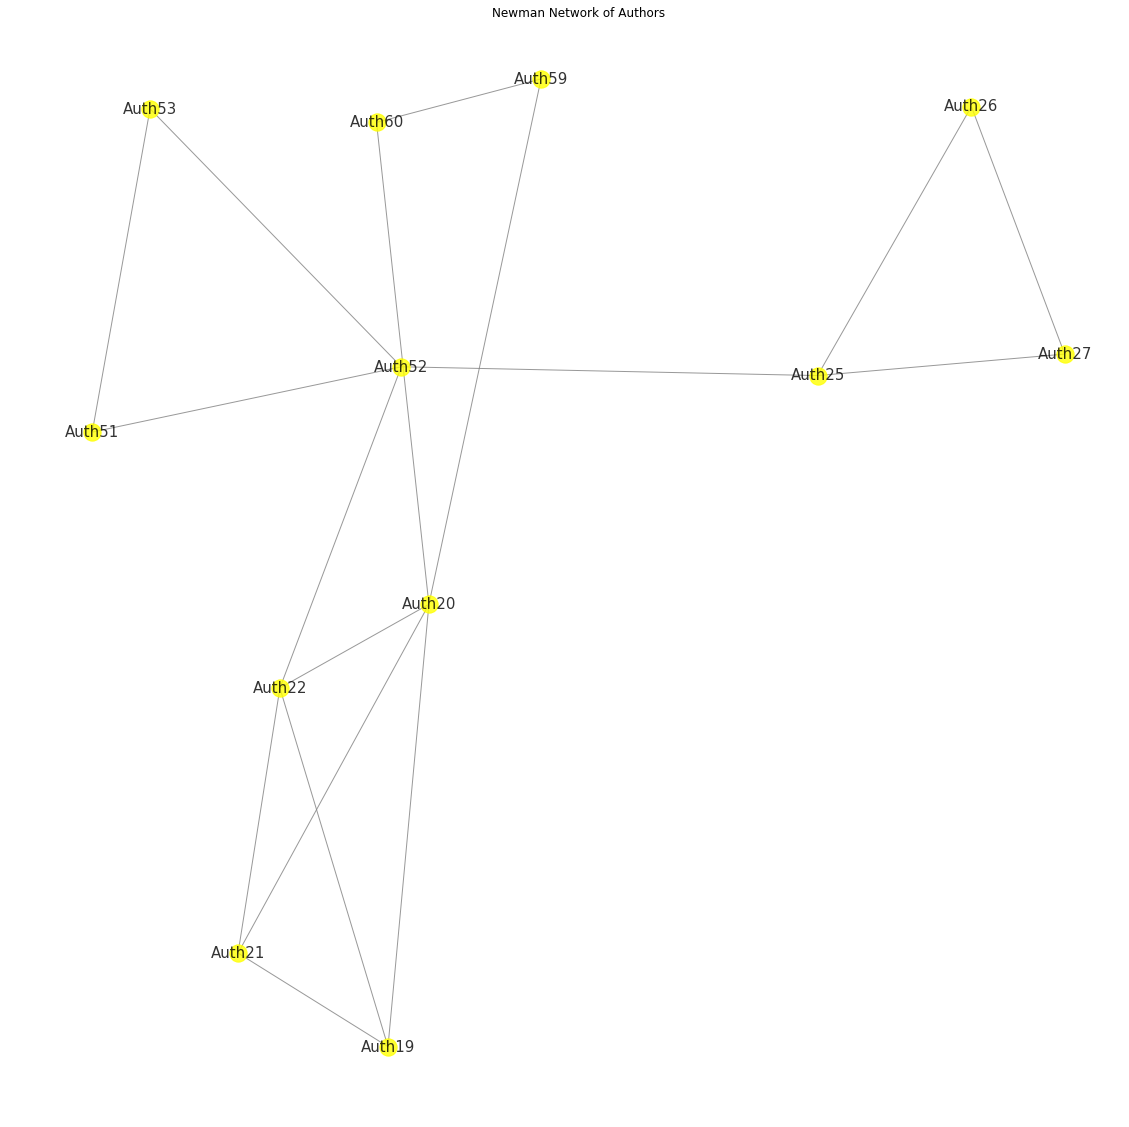

In [80]:
#Graph shows how Authors are connected, Looking at the graph looks like Auth52,Auth22,Auth20 will have 
#higher degree of betweenness which we can verify with above data
G = bipartite.projected_graph(B_max, bottom_nodes, multigraph=False)

%matplotlib inline
fig = plt.figure(figsize=(15, 15))

pos = nx.spring_layout(G, k=0.6, iterations=25)
nx.draw(G, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey', node_color = 'yellow')
plt.title('Newman Network of Authors')
plt.show()

Following network is projected graph of Publications. 

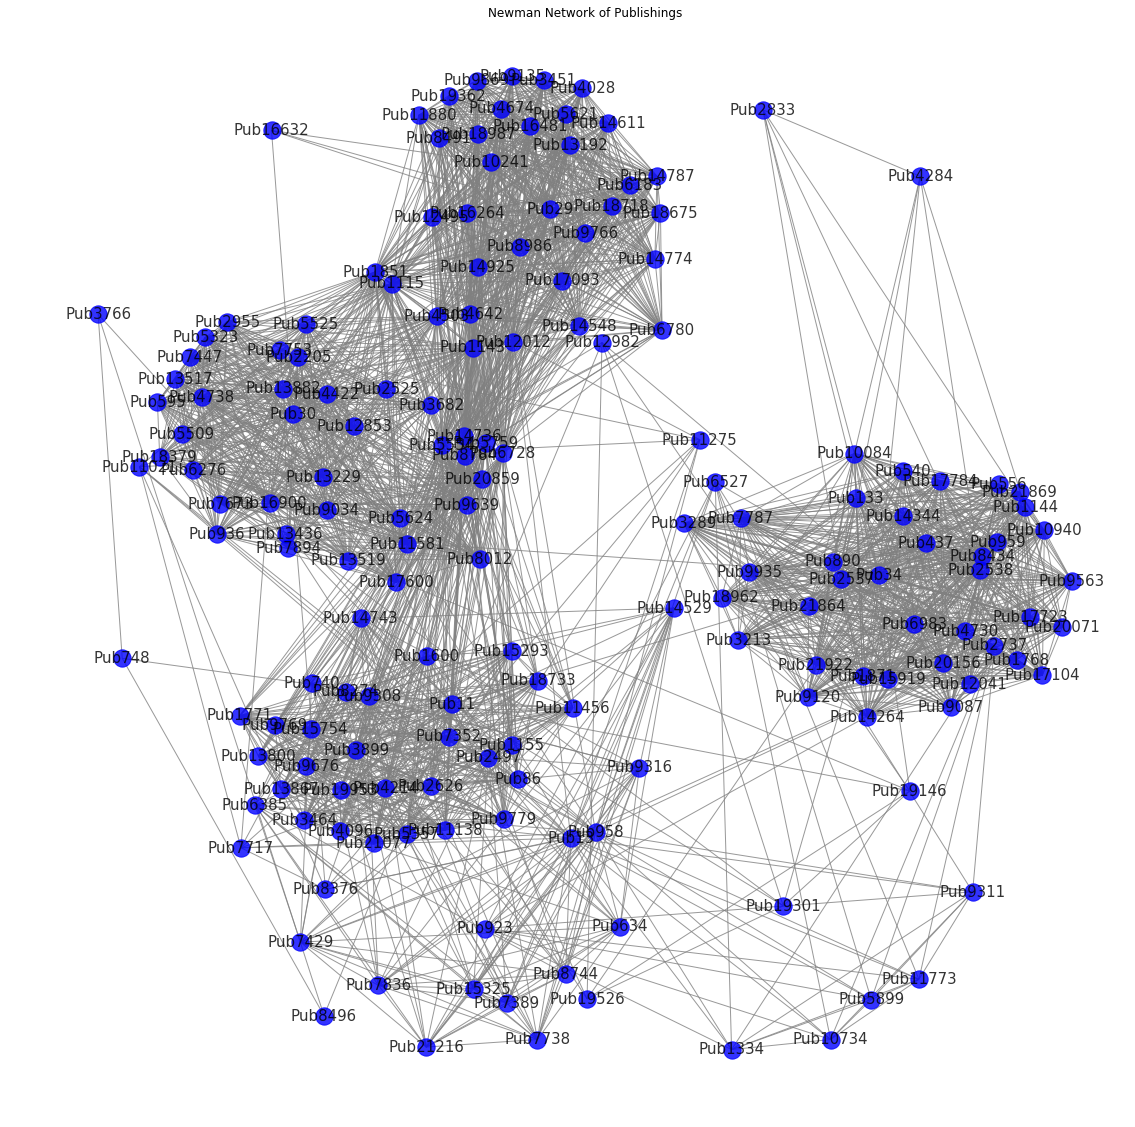

In [82]:
#Graph shows they are connected to the most part.
#Not all publications are linked. Example: publication pub748, pub8496 are not well connected , probably those subjects might
#not linked to each other or they maight be least popular subjects within the scintists. It will be interesting to see
#if we know category of those subjects

G = bipartite.projected_graph(B_max, top_nodes, multigraph=False)

%matplotlib inline
fig = plt.figure(figsize=(15, 15))

pos = nx.spring_layout(G, k=0.5, iterations=25)
nx.draw(G, with_labels=True, pos=pos, font_size=15, alpha=.8, edge_color = 'grey', node_color = 'b')
plt.title('Newman Network of Publishings')
plt.show()

###Density

A Dense graph is a graph in which the number of edges is close to the maximal number of edges. Following shows nodes in each node-set are sparsely dense. Output suggests it is not a dense graph.

In [83]:
#Density
print(bipartite.density(B_max,top_nodes))

print(bipartite.density(B_max,bottom_nodes))

0.09689922480620156
0.09689922480620156


###Clustering

Two-mode clustering metrics show there is a high level of clustering around publications . In other words Publicatins are creating clusters around authors. 

In [57]:
c = bipartite.clustering(B_max)
df = pd.DataFrame(list(c.items()), columns=['Node', 'Clustering'])
df.sort_values(['Clustering', 'Node'], ascending = False, inplace=True)
df

Node  Clustering
75    Pub9935    0.925926
26     Pub959    0.925926
139   Pub9563    0.925926
117   Pub9120    0.925926
112   Pub9087    0.925926
85     Pub890    0.925926
116   Pub8434    0.925926
22    Pub7787    0.925926
161   Pub6983    0.925926
10     Pub556    0.925926
128    Pub540    0.925926
67    Pub4730    0.925926
106    Pub437    0.925926
101   Pub3289    0.925926
48    Pub3213    0.925926
89   Pub21922    0.925926
49   Pub21869    0.925926
83   Pub21864    0.925926
151  Pub20156    0.925926
24   Pub20071    0.925926
36   Pub18962    0.925926
110   Pub1871    0.925926
32   Pub17784    0.925926
172  Pub17723    0.925926
41    Pub1768    0.925926
91   Pub17104    0.925926
3    Pub15919    0.925926
86   Pub14344    0.925926
98   Pub14264    0.925926
132    Pub133    0.925926
..        ...         ...
166   Pub6728    0.505820
57    Pub5759    0.505820
142   Pub5554    0.505820
79   Pub14736    0.505820
30   Pub16632    0.500000
23    Pub4503    0.497549
64    Pub1851    0.497549
124   Pub1143    0.497549
51    Pub1115    0.497549
181   Pub9766    0.479167
103     Pub29    0.479167
65   Pub10241    0.479167
180     Pub30    0.468468
147  Pub12012    0.442029
134    Pub958    0.363889
173     Pub13    0.363889
59      Pub34    0.359848
43      Pub11    0.241228
175    Auth21    0.142063
52     Auth19    0.126768
71     Auth27    0.105217
93     Auth60    0.102564
105    Auth26    0.098824
17     Auth25    0.089786
56     Auth59    0.075730
138    Auth20    0.074163
97     Auth52    0.057636
95     Auth51    0.049743
18     Auth22    0.042385
90     Auth53    0.042143

[184 rows x 2 columns]

###Subgroups

This occurrence of situations in which the nodes of a graph fall into two or more groups with some nodes acting as links between the groups. Following table shows subgroup formation between two different node sets.
Here we can see that which authos worked together on certan publication.

In [84]:
def get_triangles(g):
    nodes = g.nodes()
    for n1 in nodes:
        neighbors1 = set(g[n1])
        for n2 in filter(lambda x: x>n1, nodes):
            neighbors2 = set(g[n2])
            common = neighbors1 & neighbors2
            for n3 in filter(lambda x: x>n2, common):
                yield n1, n2, n3
a = get_triangles(B_max)
df = pd.DataFrame(a)
df.columns = ['node1', 'node2', 'node3']
df

node1   node2     node3
0   Auth52  Auth53   Pub1143
1   Auth52  Auth53   Pub1115
2   Auth52  Auth53   Pub1851
3   Auth52  Auth53   Pub4503
4   Auth19  Auth21     Pub11
5   Auth19  Auth20     Pub11
6   Auth19  Auth22     Pub11
7   Auth21  Auth22     Pub11
8   Auth59  Auth60   Pub2538
9   Auth59  Auth60  Pub10084
10  Auth59  Auth60   Pub2537
11  Auth59  Auth60     Pub34
12  Auth59  Auth60   Pub1144
13  Auth26  Auth27     Pub13
14  Auth26  Auth27    Pub958
15  Auth20  Auth21     Pub11
16  Auth20  Auth59     Pub34
17  Auth20  Auth60     Pub34
18  Auth20  Auth22     Pub11
19  Auth22  Auth52  Pub14736
20  Auth22  Auth52   Pub6728
21  Auth22  Auth52   Pub5554
22  Auth22  Auth52   Pub5759
23  Auth22  Auth52   Pub8784
24  Auth25  Auth52  Pub12012
25  Auth25  Auth26     Pub13
26  Auth25  Auth26    Pub958
27  Auth25  Auth27     Pub13
28  Auth25  Auth27    Pub958
29  Auth25  Auth27   Pub2497
30  Auth51  Auth52   Pub9766
31  Auth51  Auth52  Pub10241
32  Auth51  Auth52     Pub29
33  Auth51  Auth53     Pub30

###Cliques

A clique is defined as a maximal complete subgraph of a given graph. Example: a group of nodes where every node is connected directly to every other node. The word *maximal* means that no other nodes can be added to the clique without making it less connected.

When the entire two-node graph is checked for cliques, Author52 and Author59 ranked on the top. 

Author52 and Author59 creates more publications  creating more cliques.

In [85]:
c = nx.number_of_cliques(B_max)
df = pd.DataFrame(list(c.items()), columns=['Node', 'Cliques'])
df.sort_values(['Cliques', 'Node'], ascending = False, inplace=True)
df

Node  Cliques
18     Auth52       39
87     Auth59       37
103    Auth53       34
123    Auth22       30
172    Auth27       17
101    Auth26       10
142    Auth25        9
107    Auth60        7
113    Auth20        7
166    Auth51        5
77      Pub11        4
61     Auth19        4
128    Pub958        3
68      Pub34        3
17      Pub13        3
130   Pub9766        2
29    Pub8784        2
48    Pub6728        2
174   Pub5759        2
145   Pub5554        2
78    Pub4503        2
109     Pub30        2
139     Pub29        2
35    Pub2538        2
154   Pub2537        2
162   Pub2497        2
121   Pub1851        2
98   Pub14736        2
82   Pub12012        2
32    Pub1144        2
..        ...      ...
41   Pub14611        1
137  Pub14548        1
33   Pub14529        1
38   Pub14344        1
60   Pub14264        1
27   Pub13882        1
175  Pub13867        1
55   Pub13800        1
135  Pub13519        1
39   Pub13517        1
156  Pub13436        1
10    Pub1334        1
116    Pub133        1
127  Pub13229        1
182  Pub13192        1
125  Pub12982        1
152  Pub12853        1
57   Pub12495        1
150  Pub12041        1
106  Pub11880        1
179  Pub11773        1
134  Pub11581        1
176   Pub1155        1
74   Pub11456        1
183  Pub11275        1
2    Pub11138        1
108  Pub11021        1
163  Pub10940        1
46   Pub10734        1
86     Auth21        1

[184 rows x 2 columns]

In [86]:
G = bipartite.projected_graph(B_max, top_nodes, multigraph=False)
c = nx.number_of_cliques(G)
df = pd.DataFrame(list(c.items()), columns=['Node', 'Cliques'])
df.sort_values(['Cliques', 'Node'], ascending = False, inplace=True)
df

Node  Cliques
120   Pub9766        3
118    Pub958        3
75    Pub4503        3
65      Pub34        3
101     Pub30        3
130     Pub29        3
112   Pub1851        3
17      Pub13        3
25    Pub1143        3
5     Pub1115        3
74      Pub11        3
136  Pub10241        3
28    Pub8784        2
47    Pub6728        2
162   Pub5759        2
135   Pub5554        2
34    Pub2538        2
144   Pub2537        2
152   Pub2497        2
93   Pub14736        2
79   Pub12012        2
31    Pub1144        2
23   Pub10084        2
159   Pub9935        1
157   Pub9869        1
16    Pub9779        1
156   Pub9769        1
94    Pub9676        1
64    Pub9639        1
83     Pub959        1
..        ...      ...
91   Pub14743        1
41   Pub14611        1
127  Pub14548        1
32   Pub14529        1
37   Pub14344        1
168  Pub14264        1
26   Pub13882        1
163  Pub13867        1
54   Pub13800        1
125  Pub13519        1
38   Pub13517        1
146  Pub13436        1
10    Pub1334        1
107    Pub133        1
117  Pub13229        1
170  Pub13192        1
115  Pub12982        1
142  Pub12853        1
56   Pub12495        1
140  Pub12041        1
99   Pub11880        1
167  Pub11773        1
124  Pub11581        1
164   Pub1155        1
71   Pub11456        1
171  Pub11275        1
2    Pub11138        1
100  Pub11021        1
153  Pub10940        1
45   Pub10734        1

[172 rows x 2 columns]

On a projected graph, following table, shows subgroups among publications. These publications are more popular among authors.

In [89]:
def get_triangles(g):
    nodes = g.nodes()
    for n1 in nodes:
        neighbors1 = set(g[n1])
        for n2 in filter(lambda x: x>n1, nodes):
            neighbors2 = set(g[n2])
            common = neighbors1 & neighbors2
            for n3 in filter(lambda x: x>n2, common):
                yield n1, n2, n3

a = get_triangles(G)
df = pd.DataFrame(a)
df.columns = ['node1', 'node2', 'node3']
df

node1     node2     node3
0       Pub7836   Pub8744   Pub9316
1       Pub7836   Pub8744    Pub958
2       Pub7836   Pub8376    Pub958
3       Pub7836   Pub8274   Pub8744
4       Pub7836   Pub8274   Pub9316
5       Pub7836   Pub8274    Pub958
6       Pub7836    Pub923    Pub958
7       Pub7836   Pub9316    Pub958
8       Pub7836   Pub9311    Pub958
9       Pub7673   Pub9034    Pub936
10      Pub7673   Pub9034   Pub9639
11      Pub7673   Pub8012    Pub936
12      Pub7673   Pub8012   Pub9034
13      Pub7673   Pub8012   Pub9639
14      Pub7673   Pub7894    Pub936
15      Pub7673   Pub7894   Pub9034
16      Pub7673   Pub7894   Pub9639
17      Pub7673   Pub7894   Pub8012
18      Pub7673    Pub936   Pub9639
19     Pub11138   Pub1115  Pub14736
20     Pub11138   Pub1115   Pub6728
21     Pub11138   Pub1115   Pub5554
22     Pub11138   Pub1115   Pub5759
23     Pub11138   Pub1115   Pub8784
24     Pub11138   Pub4096   Pub6728
25     Pub11138   Pub4096   Pub9308
26     Pub11138   Pub4096   Pub9676
27     Pub11138   Pub4096   Pub9779
28     Pub11138   Pub4096   Pub5554
29     Pub11138   Pub4096     Pub86
...         ...       ...       ...
31129  Pub11275  Pub12012   Pub7717
31130  Pub11275  Pub12012   Pub2497
31131  Pub11275  Pub12012   Pub8376
31132  Pub11275  Pub12012     Pub13
31133  Pub11275  Pub12012   Pub7753
31134  Pub11275  Pub12012    Pub958
31135  Pub11275   Pub5899    Pub958
31136  Pub11275  Pub14743    Pub958
31137  Pub11275  Pub14743   Pub2497
31138  Pub11275  Pub11880  Pub12012
31139  Pub11275   Pub7738    Pub958
31140  Pub11275   Pub2737    Pub958
31141  Pub11275   Pub8376    Pub958
31142  Pub11275   Pub8274    Pub958
31143  Pub11275    Pub923    Pub958
31144  Pub11275    Pub634    Pub958
31145  Pub11275  Pub21216    Pub958
31146  Pub11275  Pub21216   Pub2497
31147  Pub11275   Pub6527    Pub958
31148  Pub11275   Pub9316    Pub958
31149  Pub11275   Pub2497   Pub7717
31150  Pub11275   Pub2497   Pub8376
31151  Pub11275   Pub2497   Pub7753
31152  Pub11275   Pub2497    Pub958
31153  Pub11275   Pub9311    Pub958
31154  Pub11275   Pub7389    Pub958
31155  Pub11275  Pub11773     Pub13
31156  Pub11275  Pub11773    Pub958
31157  Pub11275  Pub15325    Pub958
31158  Pub11275  Pub15325   Pub2497

[31159 rows x 3 columns]

###Final Analysis

- Authors presenting most publications
    Author52 and Author59 wrote most of the publications.
- Publications on which most Authors collaborated
   publication pub11 was the publication written in collaboration with most number of authors.

